In [28]:
# Part I: k-Means analysis - Wholesale customers
import pandas as pd
# import the csv file
input_file = "/Users/yizhouliu/Documents/HU/ANLY 530/Lab 3/Wholesale_customers_data.csv"
wholesale = pd.read_csv(input_file)
wholesale.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [29]:
# Want to see more about data?
wholesale.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [30]:
# Let's see what is off the table
for i in ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']: 
    print('Maximum of ',i, ' is',wholesale[i].max(), ' while mean value is ',wholesale[i].mean())

Maximum of  Fresh  is 112151  while mean value is  12000.297727272728
Maximum of  Milk  is 73498  while mean value is  5796.265909090909
Maximum of  Grocery  is 92780  while mean value is  7951.277272727273
Maximum of  Frozen  is 60869  while mean value is  3071.931818181818
Maximum of  Detergents_Paper  is 40827  while mean value is  2881.4931818181817
Maximum of  Delicassen  is 47943  while mean value is  1524.8704545454545


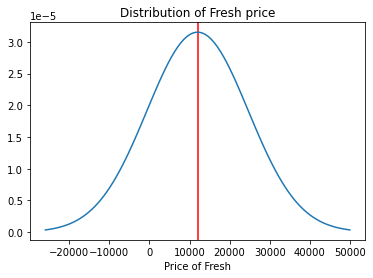

In [31]:
# What if we fit a normal distribution to one of the variables
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import norm
mu = wholesale['Fresh'].mean() 
sigma = wholesale['Fresh'].std() 
x = np.linspace(mu-3*sigma, mu+3*sigma, 100) 
#x_axis = np.arange(0, 10, 0.001) 
#plt.plot(wholesale['Fresh'].max(), norm.pdf(x,mu,sigma)) 
plt.axvline(x=mu,color='r') 
plt.plot(x, norm.pdf(x,mu,sigma)) 
#plt.plot([wholesale['Fresh'].max()], [0], marker='o', markersize=3, color="red") 
plt.title('Distribution of Fresh price') 
plt.xlabel('Price of Fresh') 
plt.show()

In [32]:
# Remove values thatare more than 3 times of std
import numpy as np 
from scipy import stats 

'''For each column, first it computes the Z-score of each value in the column, relative to the column mean and standard deviation. Then is takes the absolute of Z-score because the direction does not matter, only if it is below the threshold. all(axis=1) ensures that for each row, all column satisfy the constraint. Finally, result of this condition is used to index the dataframe.''' 
wholesale_new = wholesale[(np.abs(stats.zscore(wholesale)) < 3).all(axis=1)] 
wholesale_new = wholesale_new.drop(['Channel', 'Region'], axis= 1)
wholesale_new.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,10711.758454,4871.920290,6814.043478,2549.898551,2373.393720,1237.939614
std,9819.217756,4555.665546,6456.160715,2916.683284,3208.707909,1217.399162
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3063.250000,1477.750000,2116.000000,676.750000,252.750000,395.000000
50%,8040.000000,3530.000000,4528.000000,1447.000000,772.000000,881.000000
75%,15657.000000,6908.500000,9762.250000,3204.250000,3660.500000,1681.750000
max,49063.000000,25862.000000,34792.000000,16919.000000,17120.000000,7844.000000


In [33]:
# How many data points were dropped? 
print('Number of dropped instances= ',wholesale.shape[0]-wholesale_new.shape[0])

Number of dropped instances=  26


In [34]:
# Design the model 
# Implement Kmeans 
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=5, random_state=76964057).fit(wholesale_new) 


In [35]:
# Centroids 
kmeans.cluster_centers_

pd.DataFrame(data=kmeans.cluster_centers_, columns=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen'])


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,5601.902439,13389.902439,21652.536585,1694.121951,9204.000000,1678.512195
1,4162.772152,7627.493671,10667.253165,1331.392405,4609.582278,1411.544304
2,5043.854167,2312.118056,2759.423611,2584.423611,651.027778,838.833333
3,31873.804348,4961.956522,5597.043478,4014.217391,1002.434783,1790.391304
4,16188.663462,2925.211538,4189.673077,3117.384615,973.115385,1240.634615


In [15]:
# Q1- Given this is an imperfect real-world, you need to determine what you believe is the best value for “k” and write-up this portion of your lab report.
# Considering the within cluster sum of squares and between cluster sum of squares, the "k" value should be 5.
# When k = 5,
# Cluster 0: looks to be a heavy Fresh and above average Grocery but low Detergents_paper.
# Cluster 1: dominant in the Grocery category.
# Cluster 2: customers who do not consume as much as other clusters.
# Cluster 4: customers rely on more in Grocery and Milk, but they do not consume as much as cluster 1.
# Cluster 4: heavy in Fresh category but low in Detergents_Paper.

In [36]:
# Q2- How many points do you see in each cluster?
pd.Series(kmeans.labels_).value_counts()


2    144
4    104
1     79
3     46
0     41
dtype: int64

At k=  2 The percentage of change in SSE is  38.0597606028824 %
At k=  3 The percentage of change in SSE is  36.7913967944305 %
At k=  4 The percentage of change in SSE is  19.94915206028665 %
At k=  5 The percentage of change in SSE is  15.635519627808378 %
At k=  6 The percentage of change in SSE is  11.295115791504164 %
At k=  7 The percentage of change in SSE is  8.833462851954527 %
At k=  8 The percentage of change in SSE is  7.0617745977338275 %
At k=  9 The percentage of change in SSE is  6.5803062615751475 %
At k=  10 The percentage of change in SSE is  5.571992494841826 %
At k=  11 The percentage of change in SSE is  7.054703473127493 %
At k=  12 The percentage of change in SSE is  3.692432627569809 %
At k=  13 The percentage of change in SSE is  5.992731865415148 %
At k=  14 The percentage of change in SSE is  5.361861124884759 %
At k=  15 The percentage of change in SSE is  5.899747351111475 %
At k=  16 The percentage of change in SSE is  4.167879364644005 %
At k=  17 The pe

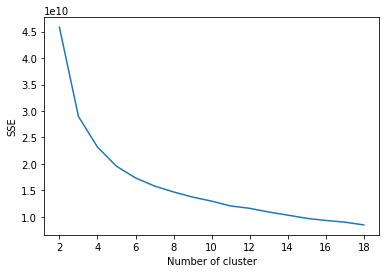

In [40]:
# Code to generate elbow graph 
sse = {} 
last_sse = 73984012841.4855 
for k in range(2, 19): 
    kmeans = KMeans(n_clusters=k, random_state=76964057).fit(wholesale_new) 
    wholesale_new["clusters"] = kmeans.labels_ 
    #print(data["clusters"]) 
    sse[k] = kmeans.inertia_ 
    # Inertia: Sum of distances of samples to their closest cluster center 
    change_per = (last_sse-kmeans.inertia_)/last_sse*100 
    print ('At k= ',k,'The percentage of change in SSE is ',change_per,'%') 
    last_sse = kmeans.inertia_
plt.plot(list(sse.keys()), list(sse.values())) 
plt.xlabel("Number of cluster") 
plt.ylabel("SSE") 
plt.show()


In [45]:
# Part II: k-Means analysis - Wine Dataset
# Import data
import pandas as pd
input_file = "/Users/yizhouliu/Documents/HU/ANLY 530/Lab 3/wine.csv"
wine = pd.read_csv(input_file)
wine.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


At k=  2 The percentage of change in SSE is  74.17179849353498 %
At k=  3 The percentage of change in SSE is  47.82453814618579 %
At k=  4 The percentage of change in SSE is  43.76290393092094 %
At k=  5 The percentage of change in SSE is  31.26272599531727 %
At k=  6 The percentage of change in SSE is  29.355404307904937 %
At k=  7 The percentage of change in SSE is  36.30582495188441 %
At k=  8 The percentage of change in SSE is  21.31162611597545 %
At k=  9 The percentage of change in SSE is  16.705478681868115 %
At k=  10 The percentage of change in SSE is  19.171090469523477 %
At k=  11 The percentage of change in SSE is  14.678107631265991 %
At k=  12 The percentage of change in SSE is  14.701842390101547 %
At k=  13 The percentage of change in SSE is  10.016590140404528 %
At k=  14 The percentage of change in SSE is  10.18142281388603 %


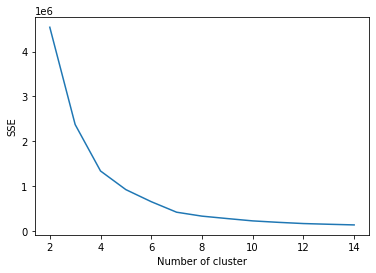

In [46]:
# Code to generate elbow graph
sse = {} 
last_sse = 17592402.70373319 
for k in range(2, 15): 
    kmeans = KMeans(n_clusters=k, random_state=1234).fit(wine) 
    wine["clusters"] = kmeans.labels_ 
    #print(data["clusters"]) 
    sse[k] = kmeans.inertia_ 
    # Inertia: Sum of distances of samples to their closest cluster center 
    change_per = (last_sse-kmeans.inertia_)/last_sse*100 
    print ('At k= ',k,'The percentage of change in SSE is ',change_per,'%')
    last_sse = kmeans.inertia_ 
plt.figure() 
plt.plot(list(sse.keys()), list(sse.values())) 
plt.xlabel("Number of cluster") 
plt.ylabel("SSE") 
plt.show()


In [47]:
# Design a model with best k=3 
kmeans = KMeans(n_clusters=3, random_state=1234).fit(wine)
pd.Series(kmeans.labels_).value_counts() 


1    69
2    62
0    47
dtype: int64

In [48]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 

# Make a comparison between actual wine type and the predicted one 
confusion_matrix(kmeans.labels_, wine['Wine']-1)

accuracy_score(kmeans.labels_, wine['Wine']-1)*100

70.2247191011236

In [49]:
# Part III: Wine Dataset
# Cluster labels
import numpy as np 
from sklearn.model_selection import train_test_split 
y = kmeans.labels_ 
X = wine.drop(['Wine'], axis=1) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1234)

In [50]:
# Train decision tree
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier 
model = tree.DecisionTreeClassifier() 
model = model.fit(X_train, y_train)


In [51]:
# Part IV: Breast Cancer Dataset
# Import data
import pandas as pd
input_file = "/Users/yizhouliu/Documents/HU/ANLY 530/Lab 3/wisc_bc_data.csv"
cancer = pd.read_csv(input_file)
cancer.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [53]:
# Split data to 80% for training. Seed is 12345
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import scale 
numbers = LabelEncoder() 
y = numbers.fit_transform(cancer['diagnosis'].astype('str'))
X = scale(cancer.drop(['id','diagnosis'], axis=1)) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12345)

In [54]:
# Implement a KNN (K- nearest neighbors) model
from sklearn.neighbors import KNeighborsClassifier 
neigh = KNeighborsClassifier(n_neighbors=21) 
neigh.fit(X, y) 


KNeighborsClassifier(n_neighbors=21)

In [55]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
y_predict = neigh.predict(X_test) 
print(confusion_matrix(y_test, y_predict))
print("accuracy= ",accuracy_score(y_test, y_predict)*100)


[[76  0]
 [ 3 35]]
accuracy=  97.36842105263158


In [19]:
# Q4- Now let’s get back to our problem of news popularity and see if we can apply KNN (K- nearest neighbors) to improve the accuracy of the model. Use the same strategy of training and testing that we did on first 2 labs, and don’t forget that whenever it is required you should use: set.seed(12345). Use PCA to reduce the number of features.
# Import data
import pandas as pd
input_file = "/Users/yizhouliu/Documents/HU/ANLY 530/Lab 3/OnlineNewsPopularity_for_python.csv"
news = pd.read_csv(input_file)
news.head(5)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,1.0,0.815385,4,2,1,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,1.0,0.791946,3,1,1,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,0.575130,1.0,0.663866,3,1,1,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,0.503788,1.0,0.665635,9,0,1,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.415646,1.0,0.540890,19,19,20,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [20]:
# Drop columns
news.drop(['url', 'n_non_stop_words', 'num_self_hrefs', 'min_positive_polarity', 'avg_negative_polarity','min_negative_polarity', 'max_negative_polarity', 'title_subjectivity'], axis='columns', inplace=True)

In [21]:
# handle goal attribute to binary
popular = news.shares >= 1400
unpopular = news.shares < 1400
news.loc[popular, 'shares'] = 1
news.loc[unpopular, 'shares'] = 0

In [22]:
# Split data to 80% for training. Seed is 12345
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import scale 
numbers = LabelEncoder() 
target = news['shares']
y = target
X = scale(news.drop(['shares'], axis=1)) 

# Normalize Data
from sklearn import preprocessing
normalizer = preprocessing.Normalizer().fit(X)
X_norm = normalizer.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.20, random_state=12345)

In [23]:
# Implement a KNN (K- nearest neighbors) model
from sklearn.neighbors import KNeighborsClassifier 
neigh = KNeighborsClassifier(n_neighbors=15) 
neigh.fit(X_norm, y) 

KNeighborsClassifier(n_neighbors=15)

In [24]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
y_predict = neigh.predict(X_test) 
print(confusion_matrix(y_test, y_predict))
print("accuracy= ",accuracy_score(y_test, y_predict)*100)

[[2468 1184]
 [1328 2949]]
accuracy=  68.31882961281373


In [ ]:
# Answer for Q4: I chose k=15 as the best value. When k=21, the accuracy rate is lower than 68%; when k=14, the accuracy rate is lower than the rate when k=15.
# Also, comparing with Lab 2, the prediction accuracy rate of news shares is higher in Lab 3.